In [2]:
from pathlib import Path

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
DATA_DIR = Path.cwd() / 'C:/Users/andre/OneDrive/Escritorio/Data Proyectos/Pokemon/data'
DATA_DIR

WindowsPath('C:/Users/andre/OneDrive/Escritorio/Data Proyectos/Pokemon/data')

In [5]:
pokemon = pd.read_csv(f'{DATA_DIR / 'pokemon.csv'}', index_col='#') 
# numero de pokemon es index
combats = pd.read_csv(f'{DATA_DIR / 'combats.csv'}')

In [6]:
pokemon.head()
pokemon.describe()
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [7]:
combats.head()
# 'combats' nos muestra que pokemon peleo contra otro y quien gana
combats.describe()
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


### Comparación entre categorías
- Tipos de Pokémon con la mayor variedad de especies: gráfico de barras que indique cuantas veces se repite
- Colores acorde al tipo, según https://www.epidemicjohto.com/t882-type-colors-hex-colors

In [8]:
pk_colors = [
	'#A6B91A', # Bug 
	'#705746', # Dark 
	'#6F35FC', # Dragon
	'#F7D02C', # Electric 
	'#D685AD', # Fairy 
	'#C22E28', # Fighting 
	'#EE8130', # Fire  
	'#A98FF3', # Flying  
	'#735797', # Ghost  
	'#7AC74C', # Grass  
	'#E2BF65', # Ground  
	'#96D9D6', # Ice  
	'#A8A77A', # Normal 
	'#A33EA1', # Poison  
	'#F95587', # Psychic 
	'#B6A136', # Rock  
	'#B7B7CE', # Steel  
	'#6390F0', # Water  
]
# recordar que los colores son fundamentales para contar una historia 

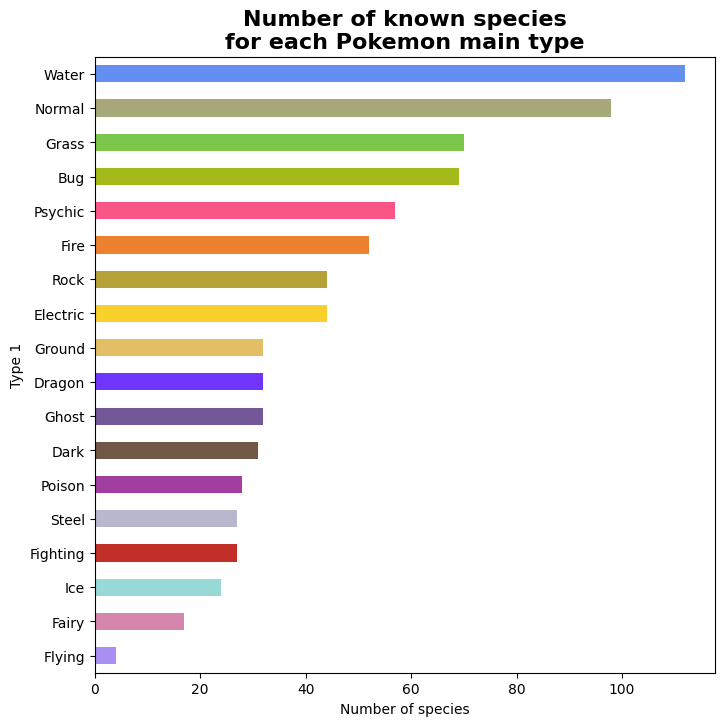

In [9]:
# grafico de barras para comparar numero de especies
pkt_cnt = pokemon['Type 1'].value_counts(sort=False).sort_index()
pkt_cnt = pd.concat(
	[pkt_cnt, pd.DataFrame(pk_colors, index=pkt_cnt.index, columns=['Colors'])], axis=1
)
# con esto hacemos un match con el tipo de pokemon y el color

pkt_cnt.sort_values('count',ascending=True,inplace=True) # ordenamos por cantidad

# Graficar
pkt_cnt_bar = pkt_cnt.plot(
    kind='barh', y='count', color=pkt_cnt['Colors'], legend=False, figsize=(8,8)
)
pkt_cnt_bar.set_title(
	'Number of known species\nfor each Pokemon main type', fontsize=16, weight='bold'
)
pkt_cnt_bar.set_xlabel('Number of species')
plt.show()

In [10]:
# utilizamos función 'pivot_table'
pkt = pokemon.pivot_table(
	index='Type 1',
	values=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed'],
	aggfunc='mean'
)
pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235


In [11]:
# total power = Attack + Defense + HP + Sp. Atk + Sp. Def + Speed
pkt['Total Power']= pkt.iloc[:, range(6)].sum(axis=1)
pkt['Color'] =pk_colors
pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed,Total Power,Color
Type 1,,,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159,378.927536,#A6B91A
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290,445.741935,#705746
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250,550.531250,#6F35FC
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000,443.409091,#F7D02C
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235,413.176471,#D685AD


### Comparar poder total medio 

Text(0.5, 1.0, 'Mean Total Power for each Pokemon main type')

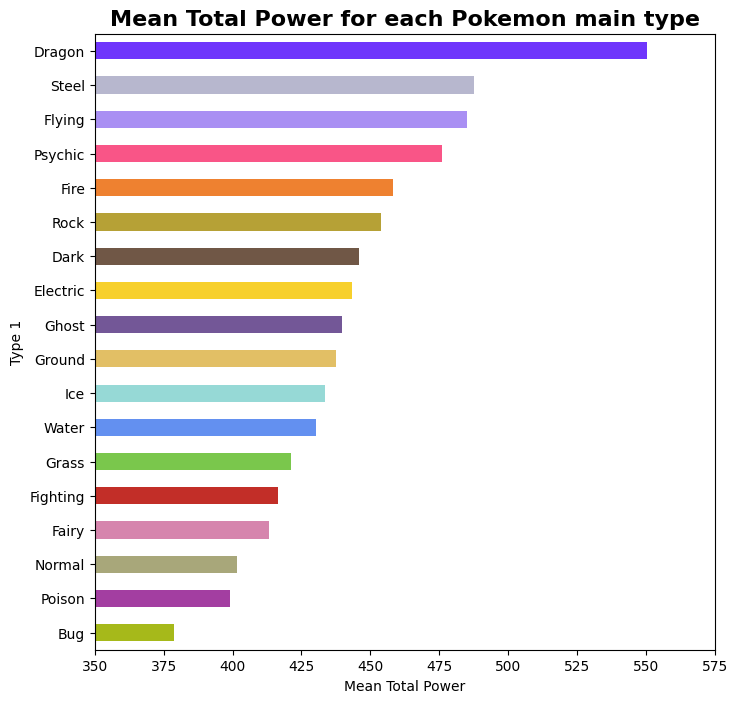

In [12]:
pkt.sort_values('Total Power', ascending=True, inplace=True)
pkt_bar= pkt.plot(
    kind='barh',y='Total Power',figsize=(8,8),color=pkt.Color, legend=False
)
pkt_bar.set_xlim((350,575))
pkt_bar.set_xlabel('Mean Total Power')
pkt_bar.set_title(
    'Mean Total Power for each Pokemon main type', fontsize=16, weight='bold'
)

### Pokemon Legendarios 
Relación de una parte en el total
- Proporción de legendarios y frecuencia
- Frecuencia respecto al tipo de Pokémon

In [13]:
pkl = pokemon.pivot_table(index='Type 1',values=['Legendary'], aggfunc='sum')
pkl.sort_index()
pkl.Legendary = pkl.Legendary.astype(int)
pkl['Total']=pokemon['Type 1'].value_counts()
pkl['Other']=pkl.Total - pkl.Legendary
pkl['Ratio']=pokemon.pivot_table(index='Type 1',values=['Legendary'],aggfunc='mean')
pkl['Percent']=pkl['Ratio']*100
pkl['Color']=pk_colors
pkl.head()

,Legendary,Total,Other,Ratio,Percent,Color
Type 1,,,,,,
Bug,0,69,69,0.000000,0.000000,#A6B91A
Dark,2,31,29,0.064516,6.451613,#705746
Dragon,12,32,20,0.375000,37.500000,#6F35FC
Electric,4,44,40,0.090909,9.090909,#F7D02C
Fairy,1,17,16,0.058824,5.882353,#D685AD


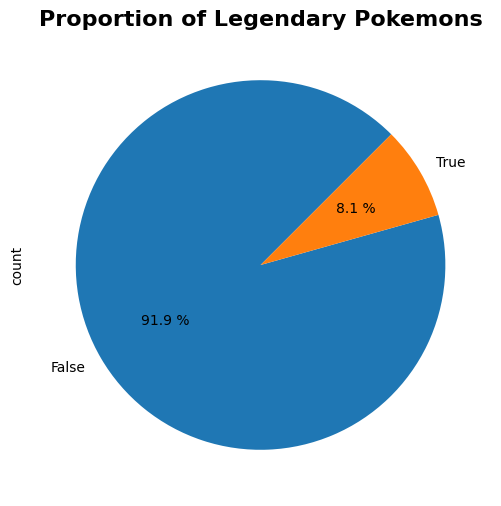

In [14]:
ax = pokemon.Legendary.value_counts().plot.pie(
    startangle=45,
    autopct='%.1f %%', # porcentaje con un decimal y signo porcentaje
    figsize=(8,6)
)
ax.set_title('Proportion of Legendary Pokemons', fontsize=16, weight='bold')
plt.show()

In [15]:
# del total de legendarios cuantos son de cada tipo
# filtramos los tipos que al menos tienen un legendario
pkl_notnull = pkl[pkl.Legendary != 0]
pkl_notnull.head()


,Legendary,Total,Other,Ratio,Percent,Color
Type 1,,,,,,
Dark,2,31,29,0.064516,6.451613,#705746
Dragon,12,32,20,0.375000,37.500000,#6F35FC
Electric,4,44,40,0.090909,9.090909,#F7D02C
Fairy,1,17,16,0.058824,5.882353,#D685AD
Fire,5,52,47,0.096154,9.615385,#EE8130


Intentamos responder al dado que el Pokémon es Legendario, que probabilidad hay de que sea de cierto tipo de Pokémon

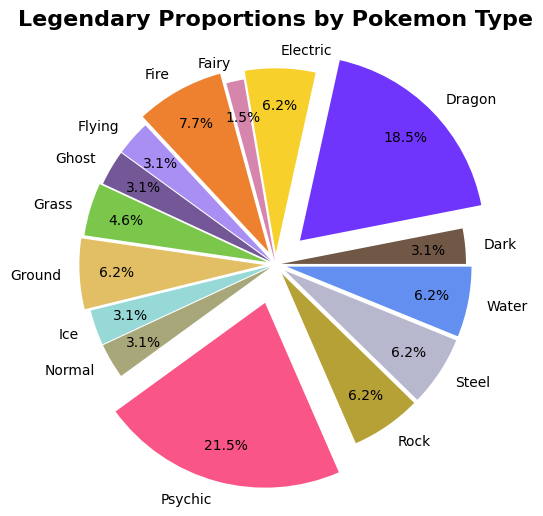

In [16]:
l_total= sum(pkl_notnull.Legendary)
ax= pkl_notnull.Legendary.plot(
    kind='pie',
    label='',
    colors=pkl_notnull.Color,
    autopct='%.1f%%',
    pctdistance=0.8,
    explode = pkl_notnull.Legendary / l_total, # efecto de realce 
    figsize=(8,6)
)
ax.set_title('Legendary Proportions by Pokemon Type', fontsize=16, weight='bold')
plt.show()

Ahora intentamos responder al dado que el Pokémon es de cierto tipo que probabilidad hay de que el mismo sea Legendario

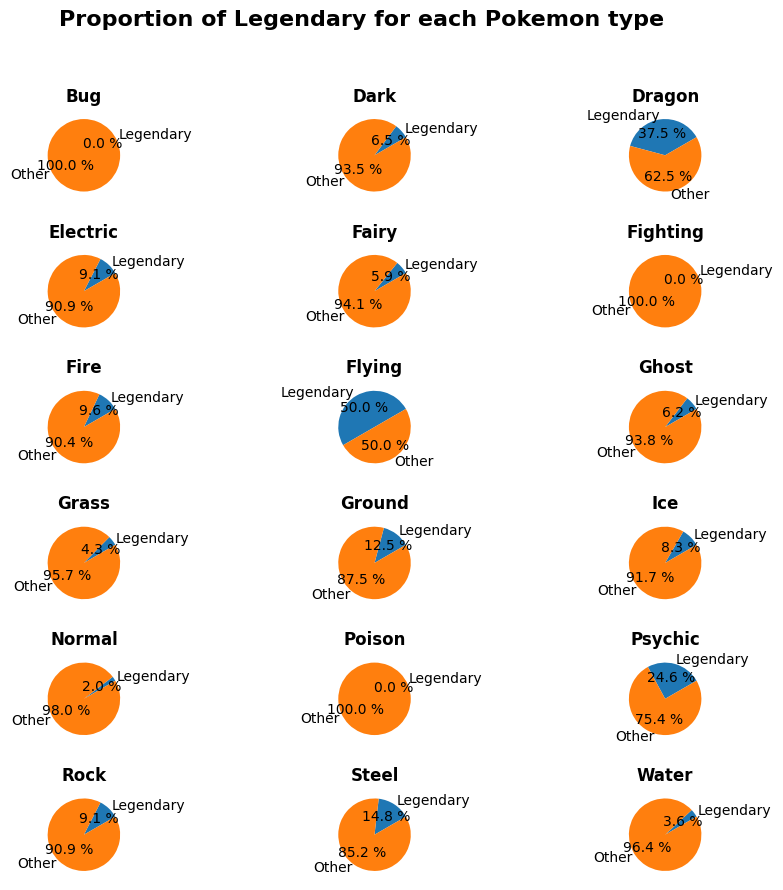

In [17]:
# dentro de cada tipo, que proporción son legendarios
cols = ['Legendary','Other']
fig,axes= plt.subplots(6,3,figsize=(10,10))
for i, idx in enumerate(pkl.index):
    ax= axes[i//3, i % 3]
    ax.pie(pkl[cols].T[idx],labels=cols,startangle=30, autopct='%.1f %%')
    ax.set_title(idx,fontdict={'size':'large','weight': 'bold'})

fig.subplots_adjust(wspace=0.5,hspace=0.5)
plt.suptitle(
    'Proportion of Legendary for each Pokemon type',fontsize=16,weight='bold'
)
plt.show()

### Cambios por generación
Veremos como han cambiado las estadisticas de una generación en otra

In [18]:
pkg= pokemon.pivot_table(
    index='Generation',
    values=['Attack','Defense','HP','Sp. Atk','Sp. Def','Speed'],
    aggfunc='mean'
)
pkg.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788


In [19]:
# requerimos datos en forma longitudinal para generar el grafico que queremos
pkg_long= pkg.reset_index().melt(id_vars='Generation')
pkg_long.head(10)
# función 'melt' permite cambiar orden de indices

,Generation,variable,value
0,1,Attack,76.638554
1,2,Attack,72.028302
2,3,Attack,81.625000
3,4,Attack,82.867769
4,5,Attack,82.066667
5,6,Attack,75.804878
6,1,Defense,70.861446
7,2,Defense,73.386792
8,3,Defense,74.100000
9,4,Defense,78.132231


Text(0.5, 1.05, 'Mean Pokemon stats along Generations')

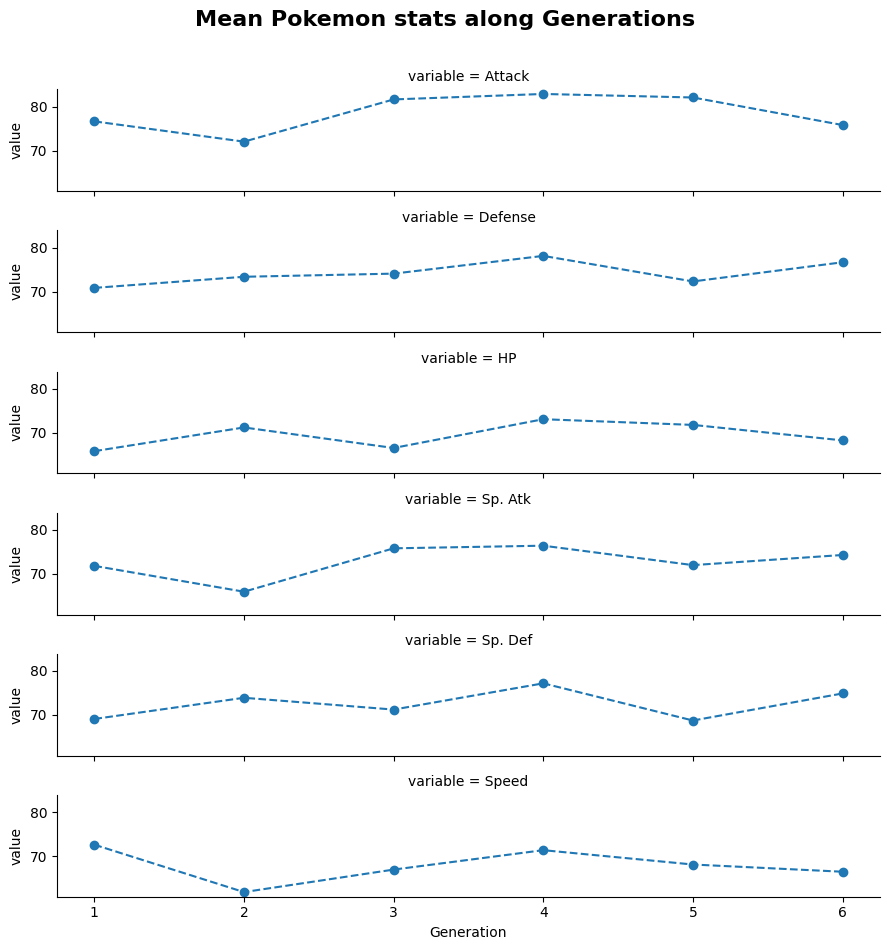

In [20]:
# con seaborn generamos grafico para ver el cambio de estadisticas a medida que cambian las generaciones
g = sns.FacetGrid(pkg_long, row='variable',height=1.5,aspect=6) 
# genera una grafica por cada valor de 'variable'

g = g.map(plt.plot,'Generation','value',linestyle='dashed',marker='o')
g.fig.suptitle(
    'Mean Pokemon stats along Generations',fontsize=16,weight='bold', y=1.05
)

Observamos que en la generación 4 aumentan las estadisticas, mientras que en la generacion 6 disminuyeron las estadisticas. AHora podemos pasar a comparar con el 'Total Power' por generación.

In [21]:
pkg['Total_Power'] = pkg.sum(axis=1)
pkg.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed,Total_Power
Generation,,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337,426.813253
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321,418.283019
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000,436.225000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843,459.016529
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788,434.987879


Text(0.5, 1.0, 'Mean Pokemon stats along generation')

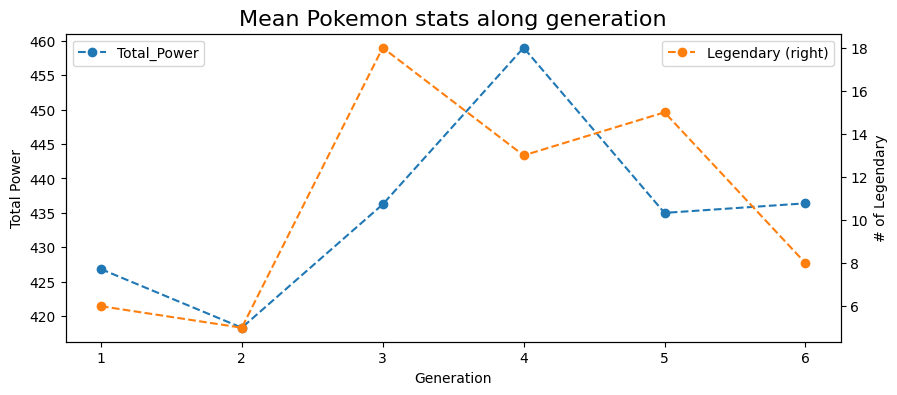

In [22]:
ax1=pkg.Total_Power.plot(kind='line',linestyle='dashed',marker='o',figsize=(10,4))
pkg['Legendary'] = pokemon.groupby('Generation')[['Legendary']].sum()
ax2= pkg.Legendary.plot(
    kind='line',linestyle='dashed',marker='o',secondary_y=True,ax=ax1
)
ax1.set_ylabel('Total Power')
ax2.set_ylabel('# of Legendary')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title(
    'Mean Pokemon stats along generation',fontsize=16
)
# grafico muestra poder total y numero de legendario a traves de las generaciones

### Conexiones y relaciones
Vamos a generar graficos que expliquen la relacion entre variables

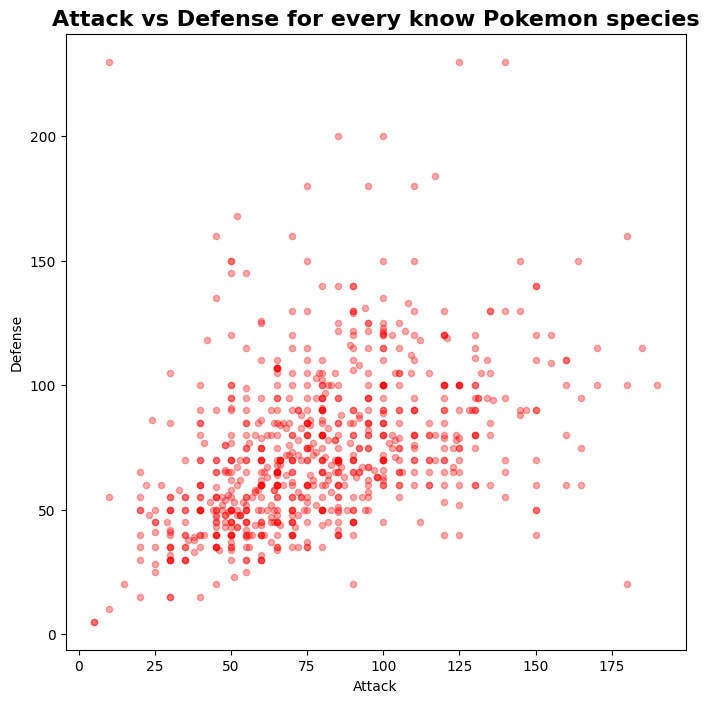

In [23]:
ax = pokemon.plot(
    kind='scatter',x='Attack',y='Defense',alpha=0.33,color='red',figsize=(8,8)
)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_title(
    'Attack vs Defense for every know Pokemon species',fontsize=16,weight='bold'
)
plt.show()
# hay algunos puntos que se escapan de la concentración mas alta
# en general los pokemon que tienen mayor ataque tienen mayor defensa, y hay algunos especializados con alta defensa o alto ataque

In [24]:
# ahora vemos algunos de los casos especificos
pokemon[(pokemon.Attack < 25)&(pokemon.Defense > 200)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


In [25]:
pokemon[(pokemon.Attack > 175)&(pokemon.Defense < 50)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1461: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))


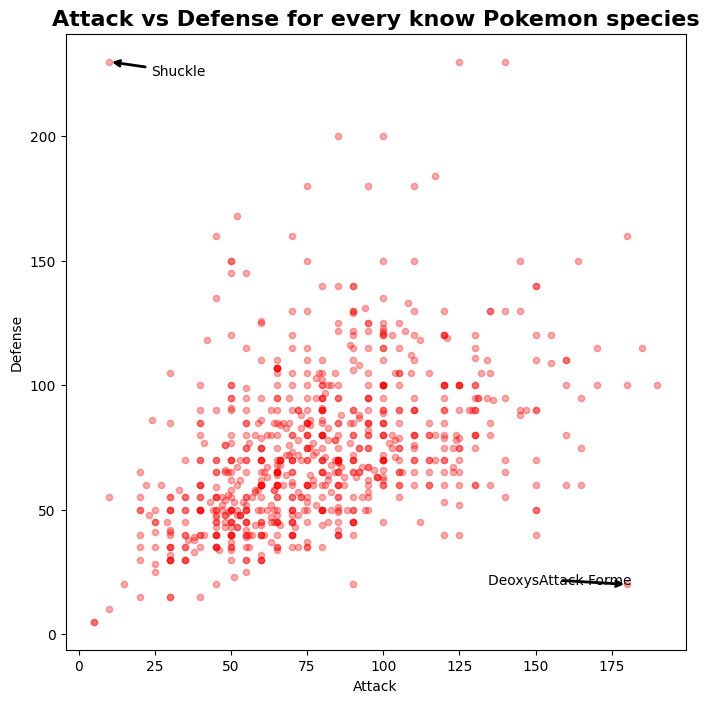

In [26]:
ax = pokemon.plot(
    kind='scatter',x='Attack',y='Defense',alpha=0.33,color='red',figsize=(8,8)
)
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_title(
    'Attack vs Defense for every know Pokemon species',fontsize=16,weight='bold'
)
pk1 = pokemon[(pokemon.Attack < 25)&(pokemon.Defense > 200)]
ax.annotate(
    pk1.Name.iloc[0],
    xy=(pk1.Attack, pk1.Defense),
    xycoords='data',
    xytext=(30,-10),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->',lw=2)
)
pk2 = pokemon[(pokemon.Attack > 175)&(pokemon.Defense < 50)]
ax.annotate(
    pk2.Name.iloc[0],
    xy=(pk2.Attack, pk2.Defense),
    xycoords='data',
    xytext=(-100,0),
    textcoords='offset points',
    arrowprops=dict(arrowstyle='->',lw=2)
)
plt.show()

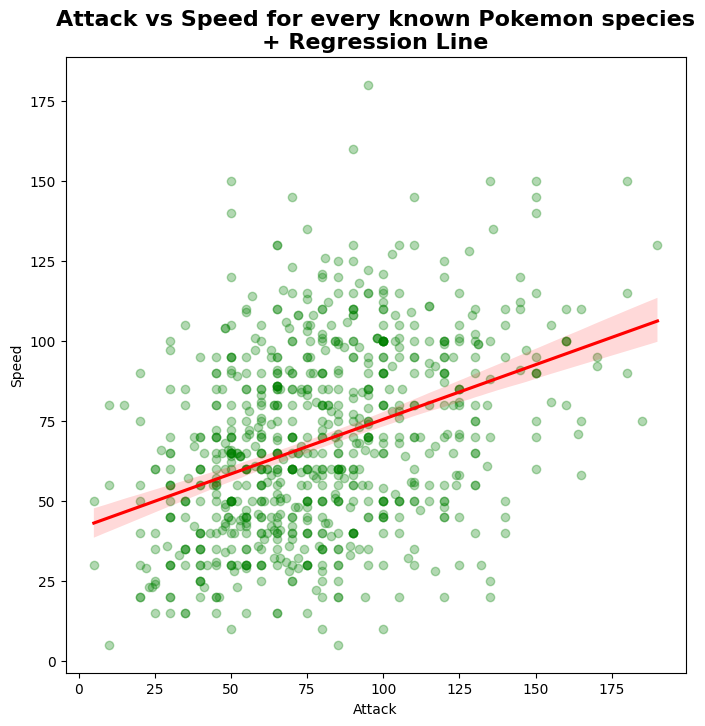

In [27]:
# relación ataque / velocidad
fig,ax = plt.subplots()
fig.set_size_inches(8,8)
sns.regplot(
    x='Attack',
    y='Speed',
    data=pokemon,
    scatter_kws={'color':'green','alpha':0.3},
    line_kws={'color':'red'}
)
ax.set_title(
    'Attack vs Speed for every known Pokemon species\n+ Regression Line',
    fontsize=16,
    weight='bold'
)
plt.show()
# linea de tendencia, representa un modelo de regresion, que muestra tendencia que ha medida que aumenta variable ataque, aumenta tambien la velocidad

TypeError: cannot unpack non-iterable float object

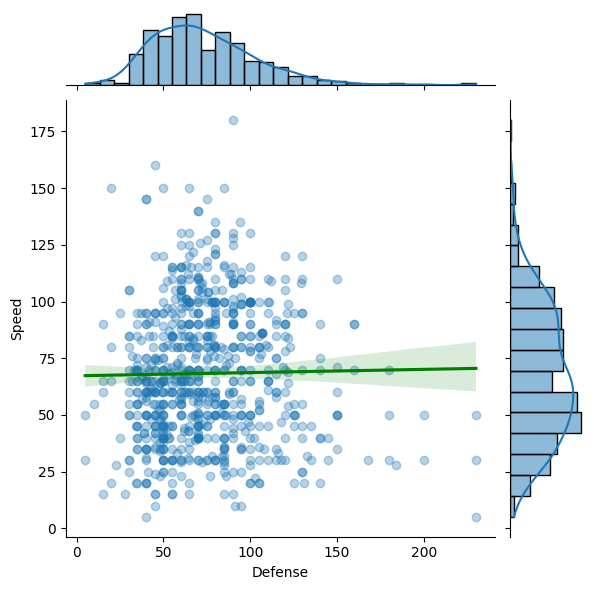

In [28]:
g = sns.jointplot(
    x='Defense',
    y= 'Speed',
    data=pokemon,
    kind='reg',
    line_kws={'color':'green'},
    scatter_kws={'alpha':0.33}
)
g.fig.set_size_inches(8.8)
g.fig.suptitle(
    'Defense vs Speed jointplot\nfor every known Pokemon species',
    fontsize=16,
    weight='bold',
    y=1.05
)
plt.show()
# grafico muestra que no hay tendencia, a medida que tienen mayor defensa, no quiere decir que sean mas rapidos

TypeError: cannot unpack non-iterable float object

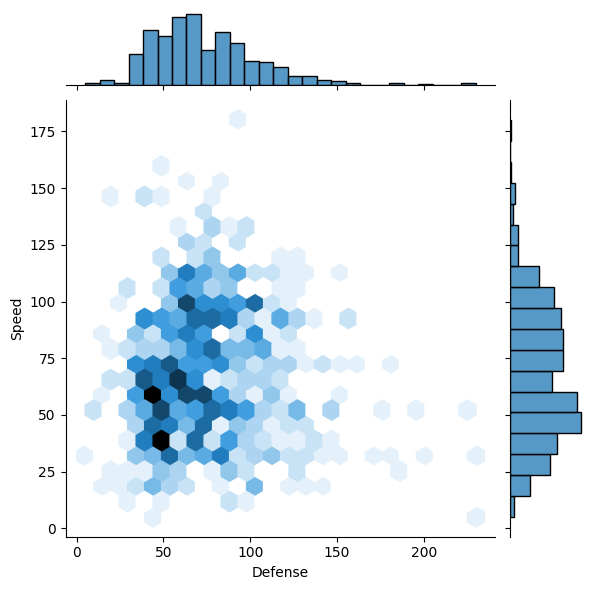

In [29]:
# mismo grafico con formato hexagonos
g = sns.jointplot(
    x='Defense',
    y= 'Speed',
    data=pokemon,
    kind='hex',
)
g.fig.set_size_inches(8.8)
g.fig.suptitle(
    'Defense vs Speed hexagon jointplot\nfor every known Pokemon species',
    fontsize=16,
    weight='bold',
    y=1.05
)
plt.show()

Relación varaibles categoricas, podemon usar grafico de caja, y comparar por ejemplo poder total de legendarios y no legendarios

In [ ]:
pokemon['Total_Power']= pokemon.iloc[:,range(3,9)].sum(axis=1)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


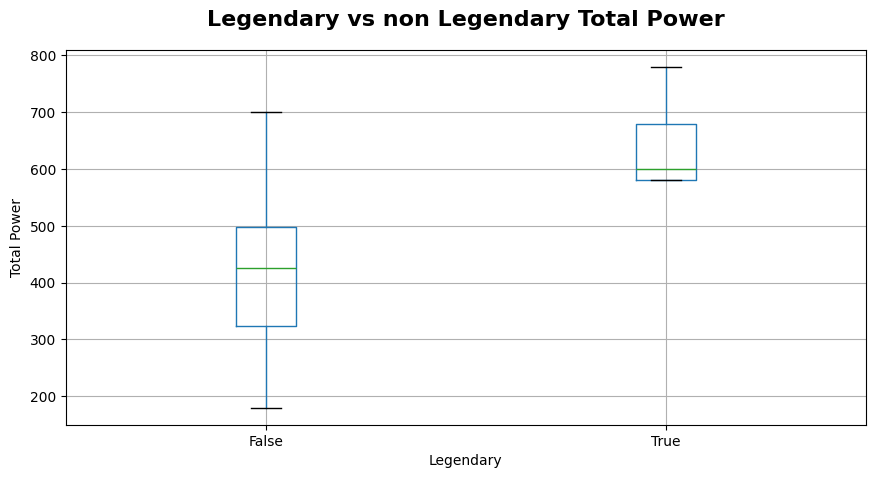

In [ ]:
ax= pokemon.boxplot(column='Total_Power',by='Legendary',figsize=(10,5))
ax.set_ylabel('Total Power')
ax.get_figure().gca().set_title('')
plt.suptitle('Legendary vs non Legendary Total Power',fontsize=16,weight='bold')
plt.show()
# pokemon legendarios esta muy por encima de los no legendarios

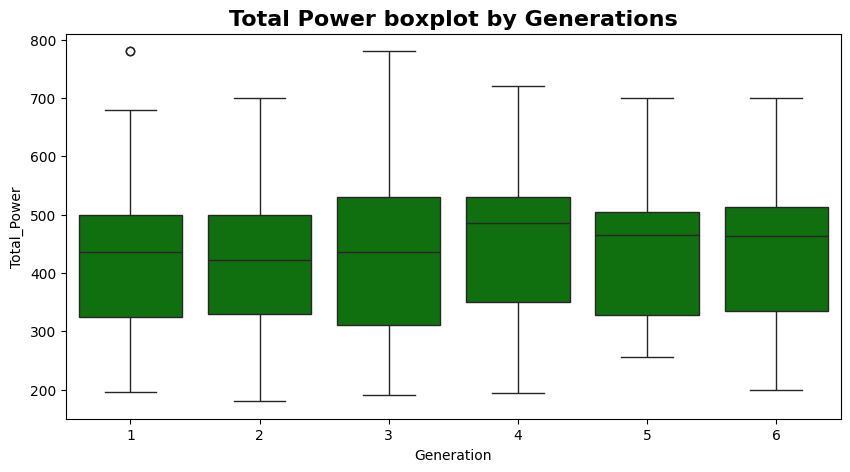

In [ ]:
# utilizando boxplot para comparar 'Total Power' por generacion
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.boxplot(x='Generation',y='Total_Power',data=pokemon, color='green')
ax.set_title('Total Power boxplot by Generations',fontsize=16,weight='bold')
plt.show()
# no hay diferencias significativas

### Relación de resultados de combates
Podriamos pensar que el primer Pokémon en atacar tendra la ventaja y mayor probabilidad de ganar

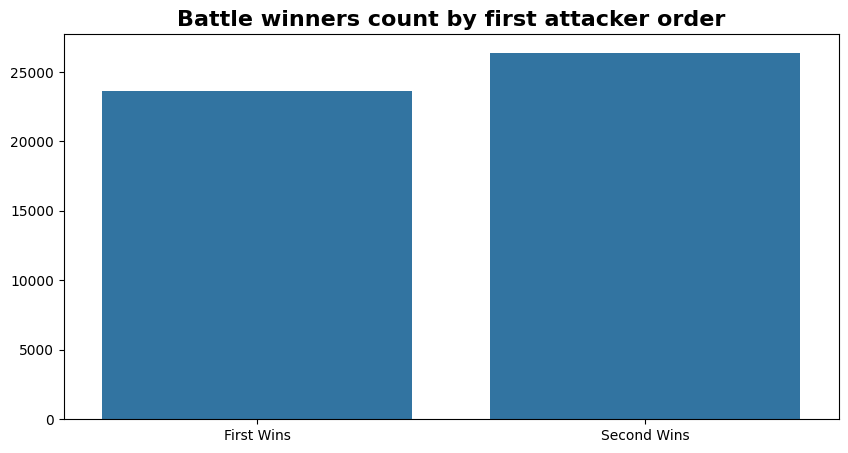

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(10,5)
first_win= sum(combats.First_pokemon == combats.Winner)
second_win= sum(combats.Second_pokemon == combats.Winner)
sns.barplot(x=['First Wins','Second Wins'],y=[first_win, second_win])
ax.set_title('Battle winners count by first attacker order', fontsize=16,weight='bold')
plt.show()

In [32]:
first_combats= combats['First_pokemon'].value_counts().sort_index()
second_combats= combats['Second_pokemon'].value_counts().sort_index()
winner_combats= combats['Winner'].value_counts().sort_index()
winner_combats = winner_combats.reindex(first_combats.index, fill_value=0)
battle_stars= pd.concat([first_combats,second_combats,winner_combats],axis=1)
battle_stars['total_combats']=total_combats=first_combats+second_combats
battle_stars['win_pct'] = winner_combats/total_combats
battle_stars.head()

pokemon['win_pct']= battle_stars.win_pct
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_pct
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,0.278195
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,0.380165
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.674242
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.560000
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,0.491071


In [33]:
pokemon['Total_Power']=pokemon.iloc[:, range(3,9)].sum(axis=1)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_pct,Total_Power
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,0.278195,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,0.380165,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.674242,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.560000,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,0.491071,309


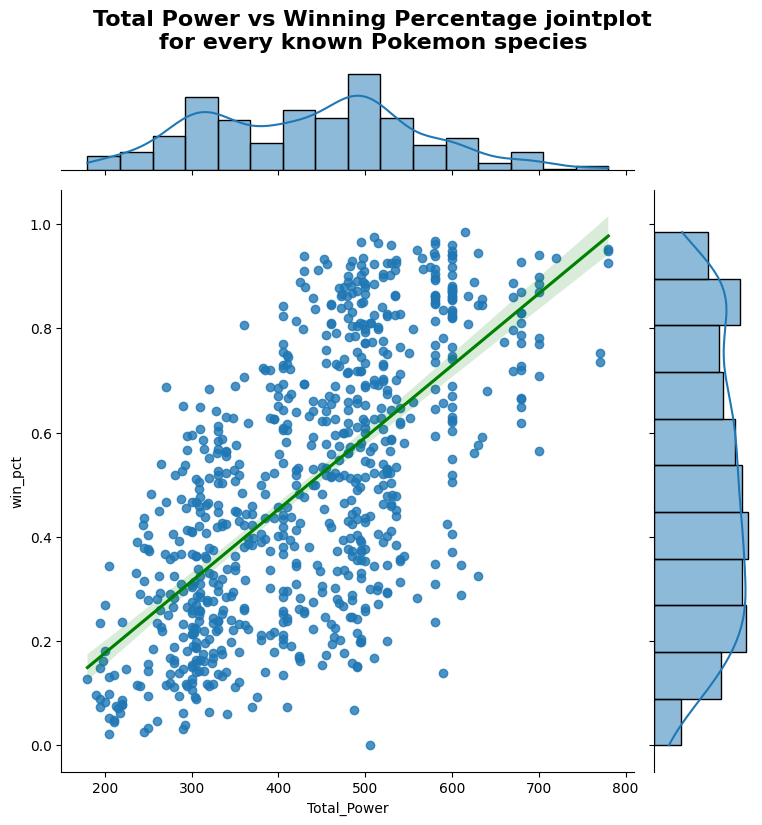

In [ ]:
# relación entre poder total y porcentaje de victorias
g= sns.jointplot(
    x='Total_Power',y='win_pct',data=pokemon,kind='reg',line_kws={'color':'green'}
)
g.fig.set_size_inches(8,8)
g.fig.suptitle(
    'Total Power vs Winning Percentage jointplot\nfor every known Pokemon species',
    fontsize=16,
    weight='bold',
    y=1.05

)
plt.show()
# poder total mas alto, mas ganan (ganan casi todas las peleas)

Text(0.5, 0.95, 'Winning Percentage vs Pokemon stats pairgrid\nfor every known Pokemon species')

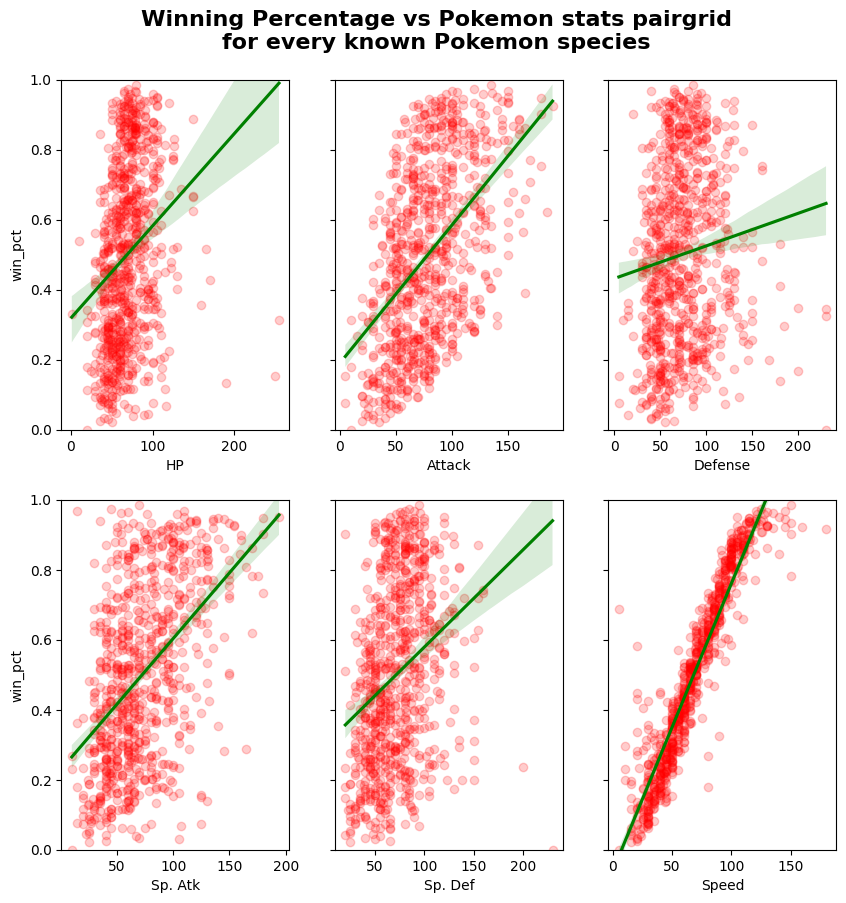

In [ ]:
fig,axes=plt.subplots(2,3,figsize=(10,10))
for i,col in enumerate(pokemon.columns[3:9]):
    ax=axes[i//3,i%3]
    sns.regplot(
        data=pokemon,
        ax=ax,
        y='win_pct',
        x=col,
        line_kws={'color':'g'},
        scatter_kws={'alpha':0.2,'color':'r'}
    )
    if i%3 > 0:
        ax.set_ylabel('')
        ax.set_yticklabels([])
    ax.set_ylim((0,1))
fig.suptitle(
    'Winning Percentage vs Pokemon stats pairgrid\nfor every known Pokemon species',
    fontsize=16,
    weight='bold',
    y=0.95
)
# vemos que la variable que mas influye de quien gana es la velocidad
# sombreado muy abierto significa mas incertidumbre

Text(0.5, 1, 'Pokemon mean stats and winning ratio\ncorrelation heatmap')

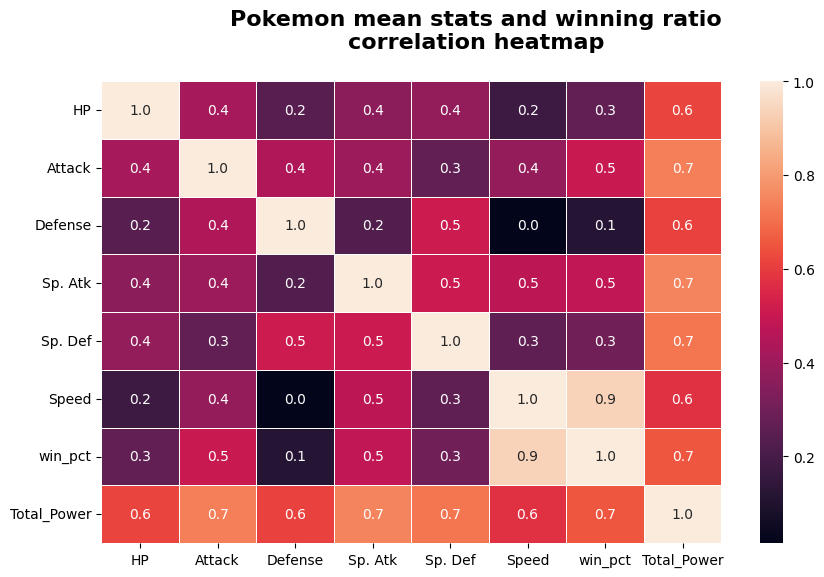

In [ ]:
# con mapa de calor
f, ax= plt.subplots(figsize=(10,6))
g= sns.heatmap(
    pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','win_pct','Total_Power']
    ].corr(),
    annot=True,
    linewidths=0.5,
    fmt='.1f',
    ax=ax
)
plt.suptitle(
    'Pokemon mean stats and winning ratio\ncorrelation heatmap',
    fontsize=16,
    weight='bold',
    y=1
)
# se verifica que la velocidad es un factor determinante para la tasa de victorias

In [34]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,win_pct,Total_Power
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,0.278195,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,0.380165,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,0.674242,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,0.560000,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,0.491071,309


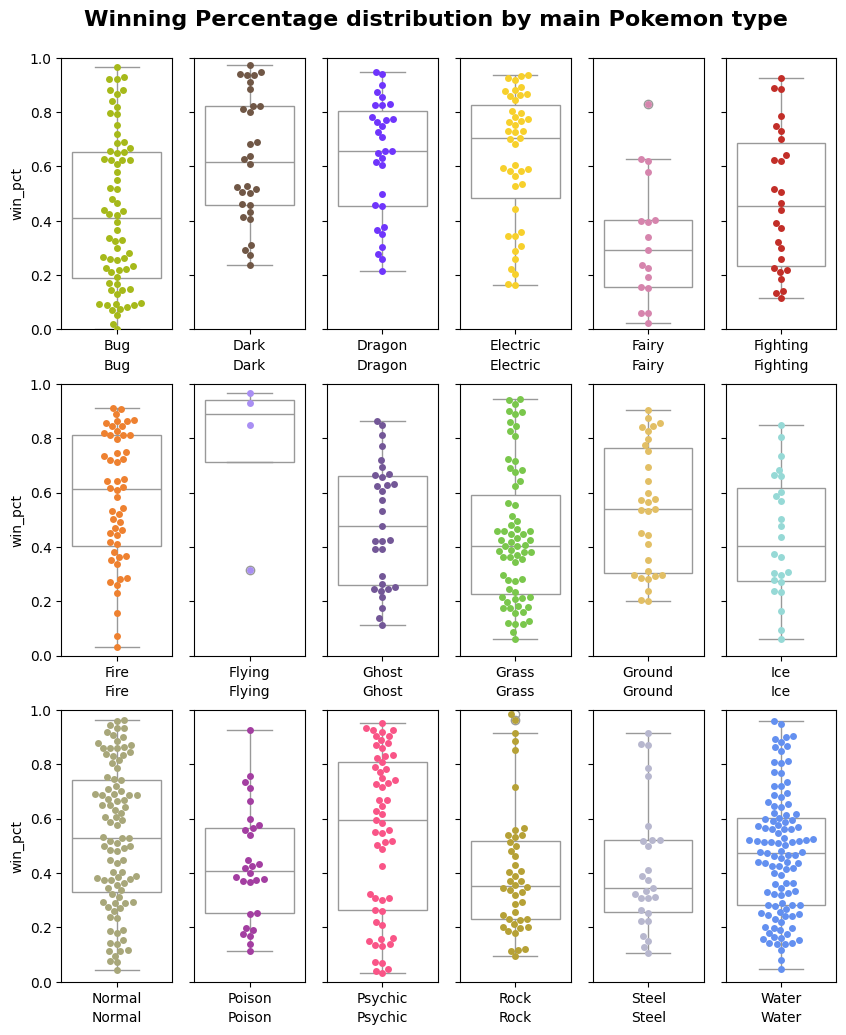

In [50]:
fig,axes=plt.subplots(3,6,figsize=(10,12))
pkt_win=pokemon[['Type 1','win_pct']]
pkt_win=pkt_win.sort_values('Type 1')
grouped= pkt_win.groupby('Type 1')

for i,(key, group) in enumerate(grouped):
    ax=axes[i//6,i%6]
    sns.boxplot(x='Type 1',y='win_pct',color='white',data=group,ax=ax)
    sns.swarmplot(x='Type 1',y='win_pct',color=pk_colors[i],data=group,ax=ax)
    if i % 6 > 0:
        ax.set_ylabel('')
        ax.set_yticklabels([])
    ax.set_xlabel(key)
    ax.set_ylim((0,1))

fig.suptitle(
    'Winning Percentage distribution by main Pokemon type',
    fontsize=16,
    weight='bold',
    y=0.92
)
plt.show()
# si comparamos entre dos tipos, si el 'boxplot' se encuentra completamente por encima, significa que tiene mayores probabilidades de ganar